Classification Between Dogs and Cats Based on Whisker length and Ear Flappiness Index

In [261]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [262]:
np.random.seed(38)

In [263]:
dogs_whisker_length=np.random.normal(loc=5,scale=1,size=10)
dogs_ear_flappiness_index=np.random.normal(loc=8,scale=1,size=10)

In [264]:
dogs_whisker_length

array([6.00870565, 4.67687665, 5.12774642, 5.27977291, 6.28873158,
       6.62529631, 4.5308096 , 3.7505997 , 4.73957476, 4.8524496 ])

In [265]:
dogs_ear_flappiness_index

array([ 7.51981737,  6.29157468,  9.10188294,  7.94991012, 10.54194065,
        9.20964234,  9.93907519,  7.7027893 ,  9.32091303,  8.01973591])

In [266]:
cats_whisker_length=np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index=np.random.normal(loc=5,scale=1,size=10)

In [267]:
cats_whisker_length

array([8.48642205, 6.13316952, 8.41367563, 8.14192179, 7.95380364,
       8.42616306, 8.64636107, 8.84710002, 8.1898932 , 8.69931817])

In [268]:
cats_ear_flappiness_index

array([4.32835291, 4.24813948, 6.57928169, 4.40174017, 7.10643076,
       3.78051778, 5.21595549, 4.7418278 , 4.87961908, 4.91707966])

In [269]:
dogs_data=np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T
data=np.vstack((dogs_data,cats_data))
labels = np.hstack((np.zeros(len(dogs_data), dtype=int), np.ones(len(cats_data), dtype=int)))


In [270]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [271]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=42)

In [272]:
X_test

array([[6.00870565, 7.51981737],
       [8.84710002, 4.7418278 ],
       [8.42616306, 3.78051778],
       [4.67687665, 6.29157468]])

In [273]:
X_train

array([[ 4.73957476,  9.32091303],
       [ 6.62529631,  9.20964234],
       [ 6.13316952,  4.24813948],
       [ 5.27977291,  7.94991012],
       [ 8.1898932 ,  4.87961908],
       [ 8.64636107,  5.21595549],
       [ 8.14192179,  4.40174017],
       [ 5.12774642,  9.10188294],
       [ 4.8524496 ,  8.01973591],
       [ 8.69931817,  4.91707966],
       [ 6.28873158, 10.54194065],
       [ 8.41367563,  6.57928169],
       [ 3.7505997 ,  7.7027893 ],
       [ 8.48642205,  4.32835291],
       [ 7.95380364,  7.10643076],
       [ 4.5308096 ,  9.93907519]])

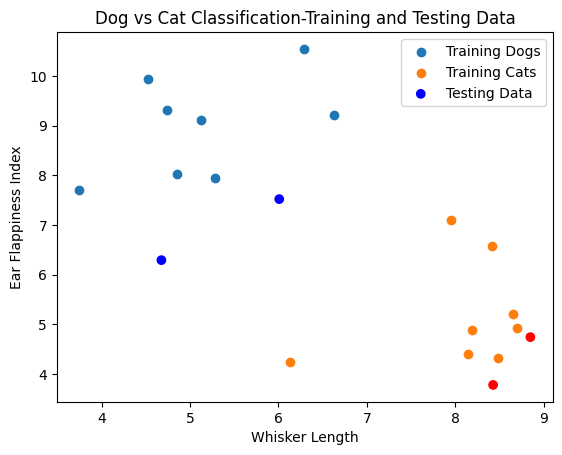

In [274]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label="Training Dogs")
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label="Training Cats")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='bwr',label="Testing Data")
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification-Training and Testing Data')
plt.legend()
plt.show()

In [275]:
def random_linear_classifier(data_dogs,data_cats,k,d):
    best_error=float('inf')
    best_theta=None
    best_theta0=None

    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

        error=compute_error(data_dogs,data_cats,theta,theta0)

        if error<best_error:
            best_error=error
            best_theta=theta
            best_theta0=theta0
    return best_theta, best_theta0, best_error


In [276]:
def compute_error(data_dogs,data_cats,theta,theta0):
    error=0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog)+theta0<=0:
            error+=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat)+theta0>0:
            error+=1
    return error

In [277]:
dogs_data=np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data=np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T

In [278]:
dogs_data

array([[ 6.00870565,  7.51981737],
       [ 4.67687665,  6.29157468],
       [ 5.12774642,  9.10188294],
       [ 5.27977291,  7.94991012],
       [ 6.28873158, 10.54194065],
       [ 6.62529631,  9.20964234],
       [ 4.5308096 ,  9.93907519],
       [ 3.7505997 ,  7.7027893 ],
       [ 4.73957476,  9.32091303],
       [ 4.8524496 ,  8.01973591]])

In [279]:
cats_data

array([[8.48642205, 4.32835291],
       [6.13316952, 4.24813948],
       [8.41367563, 6.57928169],
       [8.14192179, 4.40174017],
       [7.95380364, 7.10643076],
       [8.42616306, 3.78051778],
       [8.64636107, 5.21595549],
       [8.84710002, 4.7418278 ],
       [8.1898932 , 4.87961908],
       [8.69931817, 4.91707966]])

In [280]:
k=100
d=2
best_theta_train,best_theta0_train,train_error=random_linear_classifier(X_train[y_train==0],X_train[y_train==1],k,d)

In [281]:
x_vals_train=np.linspace(2,10,100)
y_vals_train=(-best_theta_train[0]/best_theta_train[1]*x_vals_train-(best_theta0_train/best_theta_train[1]))

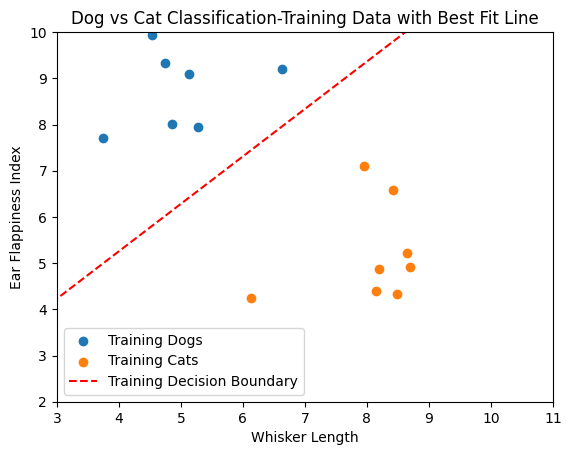

In [282]:
plt.scatter(X_train[y_train==0][:,0],X_train[y_train==0][:,1],label="Training Dogs")
plt.scatter(X_train[y_train==1][:,0],X_train[y_train==1][:,1],label="Training Cats")
plt.plot(x_vals_train,y_vals_train,color='red',linestyle='--',label='Training Decision Boundary')
plt.xlim([3,11])
plt.ylim([2,10])
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification-Training Data with Best Fit Line')
plt.legend()
plt.show()

In [283]:
print(f"Training Error:{train_error}")

Training Error:0


In [284]:
test_error=compute_error(X_test[y_test==0],X_test[y_test==1],best_theta_train,best_theta0_train)
print(f"Testing error:{test_error}")

Testing error:0


In [285]:
x_vals_test = np.linspace(2, 10, 100)
y_vals_test = (-best_theta_train[0] / best_theta_train[1]) * x_vals_test - (best_theta0_train / best_theta_train[1])


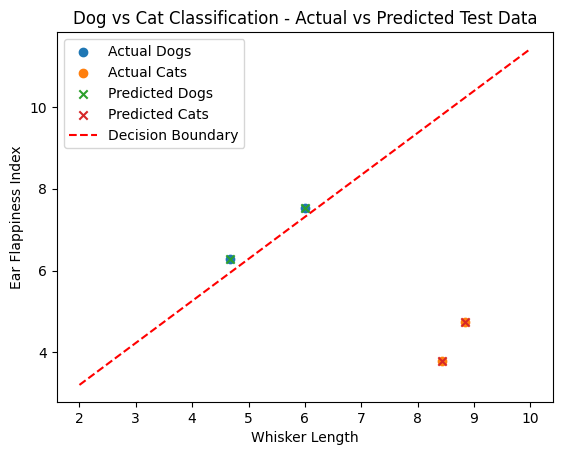

Test Accuracy: 100.00%


In [286]:
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], label='Actual Dogs')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], label='Actual Cats')

predicted_labels = np.zeros_like(y_test)
for i, x_test in enumerate(X_test):
    if np.dot(best_theta_train, x_test) + best_theta0_train <= 0:
        predicted_labels[i] = 1

plt.scatter(X_test[predicted_labels==0][:,0], X_test[predicted_labels==0][:,1], 
            marker='x', label='Predicted Dogs')
plt.scatter(X_test[predicted_labels==1][:,0], X_test[predicted_labels==1][:,1], 
            marker='x', label='Predicted Cats')

plt.plot(x_vals_test, y_vals_test, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification - Actual vs Predicted Test Data')
plt.legend()
plt.show()

test_accuracy = np.mean(predicted_labels == y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
